# Data Wrangling:
Data wrangling is the process of `Cleaning`, `transforming` and `organizing` data so that it can be used for `analysis` and `visualiztion`. It is an important step in the data analysis process because raw data is often `incomplete`, `inconsistent`, and is an `unstructured format`, which can  ake it difficult to work with.\
 Data Wrangling helps to make the data more `consistent`, `accunrate` and `useful` for analysis and decision making

> **Different techniques and styles are used while working on data wrangling.**
> 
>  **`Note`: The steps we use is data wrangling are depend on every dataset.***

* Why Data Wrangle?
* We go through this process in order to get accurate results and visualization and provide accurate solutions.

## Steps of Data Wrangling typically include:
1. `Gathering Data` (Kia clean krna ha) (What to clean?)
2. `Tools to clean data` (Libraries we use for cleaning the data)
3. `How to do` (Steps we follow in data wrangling)

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Cleaning the data
## Step:01 Dealing with Missing Data

In [9]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [10]:
df.drop(columns='deck', inplace=True)

In [41]:
# We handle the missing values thorugh the mean method.
# df = df.fillna(value = df['age'].mean())

In [12]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

> Here we did one mistake that we fill all the missing values with the mean of age column. As a result we see all the values were got filled.

> #### Now we again run the code with correction

In [13]:
# Age ki missing values fill krna ja ra ha THorugh their mean.
df['age'] = df.age.fillna(value = df['age'].mean())

In [14]:
df.isnull().sum() / len(df) * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [15]:
# df['embarked'] = df.embarked.fillna(value = df['embarked'].mode())
# In this code we got an error. 

In [16]:
df['embarked'] = df.embarked.fillna(value = df['embarked'].mode()[0])
# Is ma mode ka bad 0 is lia lagaya hai ku ka mode 1 sa zada ho sakta ha 1 varible ka 
# we put 0(zero) because we want to put or fill first mode value 
# That is why we select first mode of embarked

In [17]:
df.isnull().sum() / len(df) * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [18]:
df['embark_town'] = df.embark_town.fillna(value = df['embark_town'].mode()[0])


In [19]:
df.isnull().sum() / len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Cleaning the data
## Step:02 Correcting Errors in the Data
### > Outliers Removal

### Now we Extract Outliers: Through `Visualiztion Method`

<AxesSubplot: xlabel='sex', ylabel='age'>

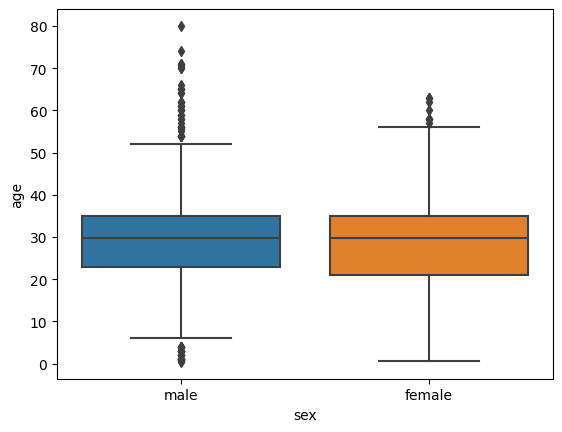

In [20]:
import seaborn as sns

sns.boxplot(df, y='age' ,x='sex')

# IQR Method:

In [21]:
# IQR Method:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the Lower and upper Bound
lower_bound = Q1 -  1.5 * IQR
upper_bound = Q3 +  1.5 * IQR

# Remove Outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


In [22]:
df.shape

(825, 14)

In [23]:
# IQR Method:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the Lower and upper Bound
lower_bound = Q1 -  1.5 * IQR
upper_bound = Q3 +  1.5 * IQR

# Remove Outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]


In [24]:
df.shape

(718, 14)

<AxesSubplot: xlabel='age', ylabel='Count'>

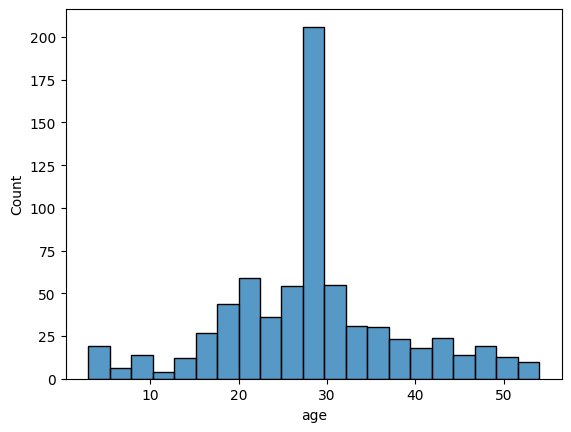

In [25]:
sns.histplot(df, x='age')

<AxesSubplot: xlabel='fare', ylabel='Count'>

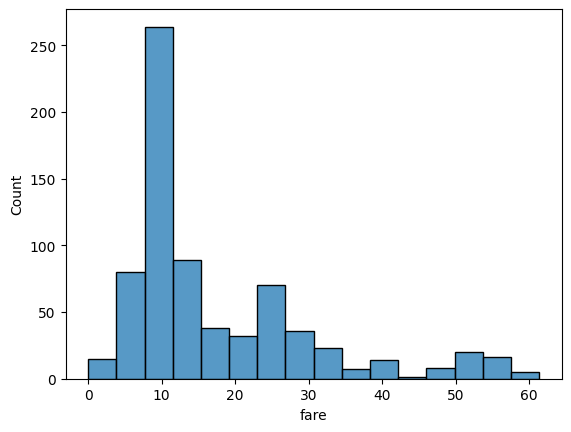

In [26]:
sns.histplot(df['fare'])

### `Another Mehtod`: Z-Score Method:

In [27]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# from scipy import stats
# import numpy as np

# zscore = np.abs(stats.zscore(df[['age']],axis=1))
# threshold = 3
# # df = df[(zscore < threshold)]

# Cleaning the data
## Step:03 Droping Dublicates

### Finding and Dropping Dublicates:

In [29]:
# df.drop_duplicates(inplace=True)

In [30]:
df.shape

(718, 14)

#### Now we make a mistake again, in this we drop the duplicate values without any checking that which column contain the duplicate values and visialize the columns either is there any column which have duplicate values but they have different unique column values or not.

In [31]:
# Find Duplicates
df.duplicated().sum()

103

In [32]:
df1_duplicates = df[df.duplicated()]
df1_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


* Now we drop dublicates row wise not column wise.
* It will find in entire dataset

In [33]:
df1_duplicates.shape

(103, 14)

In [34]:
# df[''].duplicated().value_counts()

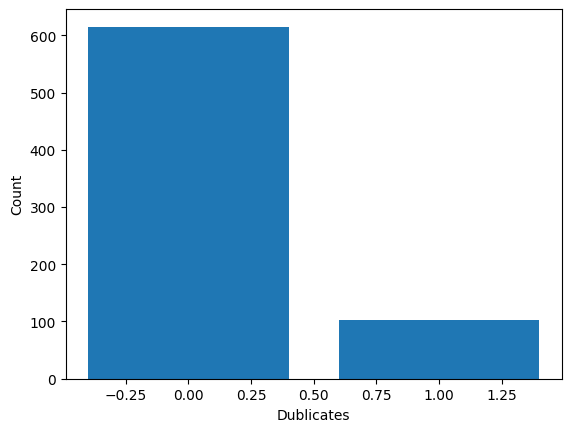

In [35]:
df1_duplicates = df.duplicated()
df1_duplicates_count = df1_duplicates.value_counts()

plt.bar(df1_duplicates_count.index, df1_duplicates_count.values)
plt.xlabel('Dublicates')
plt.ylabel('Count')
plt.show()

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(615, 14)

In [39]:
df.duplicated().sum()

0

# Tranforming the data
## Step:01 Normalize the data (Data Normalization)

> * Now What is or to `normalization`?
> * Normalization refers to the process of scaling data so that it has a mean value of 0 and standard deviation of one. This helps
> * To bring data at one scale, we `normalize` the data who are in different scale.
> * Now there are `different methods` to normalize the data.

### 01. Min-Max Scaler

In [40]:
# We use this libraary for data normalization.
pip install scikit-learn

SyntaxError: invalid syntax (3392920965.py, line 2)

In [ ]:
# Now there are 2 libraries in which we noramlize

# 01. Import Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 02. Data
# Now we import or call our data
df = sns.load_dataset('titanic')

# 03. Select coloumns to normalize.
# Now which column we mostly normalize?
# We normalize that column which has numeric datatype or have units in that specific column  
cols_to_normalize = ['age','fare']

# 04. Create a scaler function/tool
scaler = MinMaxScaler()

# 05. Fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 06. Check the data
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.describe()

* Now the column we normalize are converted into 0 to 1 values
* Like i select the age column so it can be seen that their values are now in 0 to 1.

### 02. Standard Scaler

In [ ]:
# 01. Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 02. Data
# To import or call your data
df

# 03. Select coloumns to normalize.
cols_to_normalize = ['age','fare']

# 04. Create a scaler function/tool
scaler = StandardScaler()

# 05. Fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 06. Check the data
df


In [ ]:
df.describe()

* There is role of `mean and standard deviation` in the standard scaler.
* It's not about `min and max` values.
* In this, we minus the value from their `mean` and then divide the final value with `standard deviation`.
* The value we get is in between `-3 to +3`.
* In this, we try to `normalize the bell curve` of any required column.

### 03. Log tranformation:

In [ ]:
import seaborn as sns

kashti = sns.load_dataset('titanic')

kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* Now in this we have to on two step at the same time.
  1. To fill the null values 
  2. At the same time, we use log transformation to reduce the outliers.

In [ ]:
kashti.head()

In [ ]:
import numpy as np

# Filling null values
kashti['age'] = kashti['age'].fillna(kashti['age'].median()) # Mean, median and mode 3 istemal kr sakta 
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# Log Transformation:
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])#np.log mean data ko noraml krna ka liya us ka Algorithm lena

kashti.head()

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


* When you use `log transformation` your values are converted into `small scale values`.
* This is the `type of scale` who have a valu3 in between `0 to 3`
* It will tell you the `range` of your data automatically and automatically except the `range` of your data.

### If your values are not near to 0 then you use this method.

### But If your values are near to 0 then you use `log1p`.
* for example if your age column contain mostly children age then you us this `log1p`.

In [ ]:
# import numpy as np

# # Filling null values
# kashti['age'] = kashti['age'].fillna(kashti['age'].median()) # Mean, median and mode 3 istemal kr sakta 
# kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# # Log Transformation:
# kashti['age'] = np.log1p(kashti['age'])
# kashti['fare'] = np.log1p(kashti['fare'])#np.log mean data ko noraml krna ka liya us ka Algorithm lena

# kashti.head()

<AxesSubplot: xlabel='sex', ylabel='fare'>

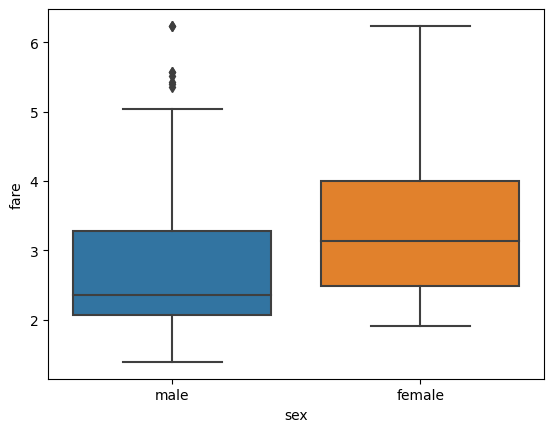

In [ ]:
sns.boxplot(kashti, x='sex',y='fare')

<AxesSubplot: xlabel='age', ylabel='Count'>

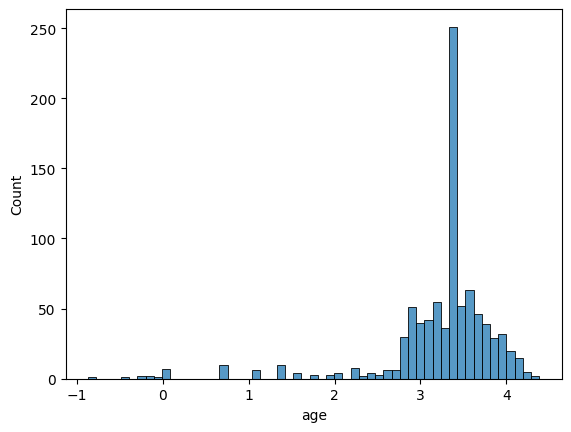

In [ ]:
sns.histplot(kashti['age'])

### Note: 
* It is not a good thing to normalize every column. Before normalization, we should check the normalization of every column through histplot. Sometime, when we use log transformation their histplot will against them. sometime the curve was not satisfy.
* If one mehtod is not working with specific column then use another one. 

## Organizing the data:

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

* Now we are going to create new columns.

In [ ]:
df['family_size'] = df['sibsp'] + df['parch']

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sex', ylabel='age'>

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


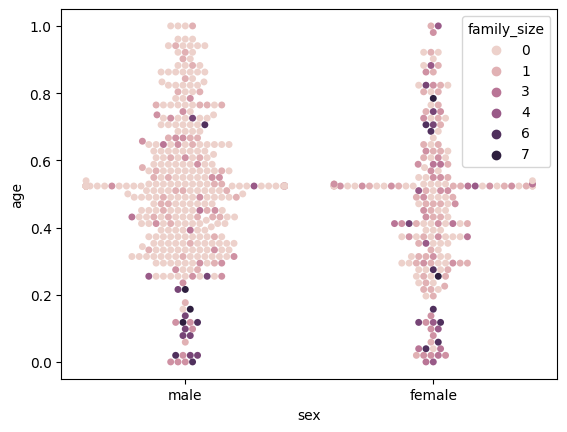

In [ ]:
sns.swarmplot(df, x='sex', y='age', hue='family_size')

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='survived', ylabel='age'>

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


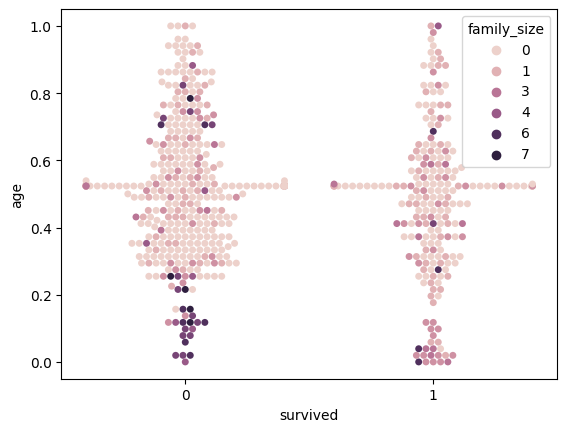

In [ ]:
sns.swarmplot(df, x='survived', y='age', hue='family_size')

> To rename the column

In [ ]:
df = df.rename(columns={'survived':'survival'})

In [ ]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

* Now we organize the data in order to give summary of data with the help of pivot table.

In [ ]:
table = pd.pivot_table(df, values='fare',index='pclass',
     columns = 'survival' , aggfunc=np.sum)
table

survival,0,1
pclass,,
1,5174.7206,13002.6919
2,1882.9958,1918.8459
3,5085.0035,1629.6916


* Pivot table give you results in grouping form.

In [ ]:
table = pd.pivot_table(df, values='age',index='pclass',
     columns = 'survival' , aggfunc=np.sum)
table

survival,0,1
pclass,,
1,2796.5,4314.92
2,3019.0,2149.83
3,7170.0,1754.92


* np.sum mean how much they collected the fare from each class

In [ ]:
table = pd.pivot_table(df, values='fare',index='pclass',
     columns = 'survival' , aggfunc=np.mean) # np.mean ka mutlab ha ka average karaya kitna tha
table

survival,0,1
pclass,,
1,64.684007,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


### Now while organizing the data, we also check the relationship of data in aggregation.

<AxesSubplot: xlabel='fare', ylabel='age'>

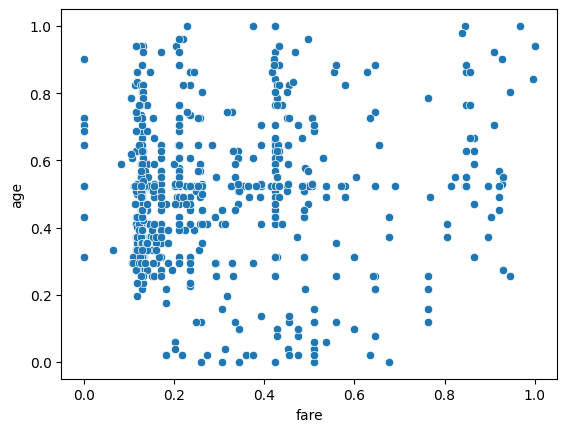

In [ ]:
sns.scatterplot(df, x='fare', y='age')

* Now we are checking their correlation

### Now after all the step we follow, now our is ready for machine learning and for other purposes.

In [ ]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


# Now we saving the wrangle the data

In [ ]:
df.to_csv('preprocessed_data.csv')